# Analysis of traditional stock and bond portfolios: Conservative, Moderate, and Aggressive

## Performing analysis on traditional portfolios to set a benchmark to compare risk/return to portfolios that include digital assets

In [5]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
import numpy as np
import alpaca_trade_api as tradeapi
import hvplot.pandas

In [8]:
from MCForecastTools import MCSimulation

In [9]:
# Load .env variables
from dotenv import load_dotenv
load_dotenv("alpaca_keys.env")

True

In [10]:
# Set alpaca key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

## Find risk and return on traditional portfolios
### Define assets and weights

In [11]:
# Define assets and weights for conservative portfolio 
conservative_tickers = ['BIV', 'BSV,' 'VB', 'VV', 'VXUS']
cons_weights = [.4, .1, .2 ,.25, .05]

In [12]:
# Define assets and weights for moderate portfolio
moderate_tickers = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
mod_weights = [.3, .25, .25, .05, .15]

In [13]:
# Define assets and weights for aggressive portfolio
aggressive_tickers = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
agg_weights = [.1, .30, .30 ,.1, .2]

### Run Monte Carlo simulation on conservative portfolio

In [14]:
# Set timeframe to 1 day
timeframe = "1D"

# Set start and end dates
start_date = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-10', tz='America/New_York').isoformat()

# Get 6 years worth of price data
conservative_data = api.get_barset(
    conservative_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df



In [15]:
# Clean data
conservative_data = conservative_data.dropna()
conservative_data.head()

BIV                                     BSV  \
                            open   high      low  close    volume   open   
time                                                                       
2017-11-21 00:00:00-05:00  84.26  84.30  84.1300  84.21  440780.0  79.39   
2017-11-22 00:00:00-05:00  84.28  84.48  84.2300  84.42  459607.0  79.41   
2017-11-24 00:00:00-05:00  84.37  84.43  84.3500  84.38  223736.0  79.43   
2017-11-27 00:00:00-05:00  84.41  84.48  84.3100  84.43  424371.0  79.44   
2017-11-28 00:00:00-05:00  84.53  84.58  84.4316  84.49  430305.0  79.48   

                                                              ...      VV  \
                            high      low   close     volume  ...    open   
time                                                          ...           
2017-11-21 00:00:00-05:00  79.40  79.3300  79.360   887800.0  ...  119.05   
2017-11-22 00:00:00-05:00  79.48  79.3900  79.470   932371.0  ...  119.50   
2017-11-24 00:00:00-05:00  79.46  79.4222  79.445   395388.0  ...  119.65   
2017-11-27 00:00:00-05:00  79.48  79.4000  79.465   789211.0  ...  119.70   
2017-11-28 00:00:00-05:00  79.50  79.4500  79.460  1252836.0  ...  119.81   

                                                                VXUS         \
                               high     low   close    volume   open   high   
time                                                                          
2017-11-21 00:00:00-05:00  119.5200  119.05  119.42  121311.0  56.10  56.30   
2017-11-22 00:00:00-05:00  119.5800  119.28  119.36  111051.0  56.51  56.53   
2017-11-24 00:00:00-05:00  119.6900  119.52  119.61   71618.0  56.71  56.75   
2017-11-27 00:00:00-05:00  119.8099  119.44  119.63  122179.0  56.59  56.59   
2017-11-28 00:00:00-05:00  120.7600  119.75  120.71  158471.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [13]:
# Define monte carlo simulation
MC_conservative = MCSimulation(
    portfolio_data = conservative_data,
    weights = cons_weights,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [15]:
# Run monte carlo simulation
MC_conservative.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994131,1.006102,0.997299,1.000927,0.995730,1.004917,1.002122,0.994565,0.998999,1.002225,...,0.991872,1.000905,0.987387,0.999741,0.999574,0.998019,0.992363,0.997269,0.991152,1.008948
2,0.989465,1.008190,0.999035,0.998091,0.999045,1.002897,1.000837,0.987291,0.998897,1.002059,...,0.993310,1.000878,0.992083,0.990629,1.003078,0.999041,0.993097,0.998213,0.993696,1.004348
3,0.993922,1.008472,1.002407,1.003671,0.994077,0.999187,1.000782,0.997062,0.988874,1.008459,...,0.998759,1.001189,0.987161,0.995148,1.000426,1.000349,0.991016,0.999682,0.994427,1.010213
4,0.984974,1.009070,0.999004,0.999805,0.995643,1.008230,0.994903,0.995587,0.991189,1.014729,...,1.002579,1.001325,0.983775,0.999036,0.992307,0.996891,0.997587,1.000163,1.000954,1.004187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,4.404049,4.858748,4.296901,6.123559,4.353784,4.654200,3.720260,6.355627,3.515846,7.399227,...,5.042782,4.592417,7.094866,5.527145,3.927084,6.822078,5.953890,5.873687,6.341692,3.755020
5037,4.410474,4.883439,4.279758,6.151819,4.400169,4.637833,3.707189,6.314179,3.528198,7.380094,...,5.036303,4.595372,7.122765,5.566210,3.929246,6.849056,5.952355,5.865147,6.341808,3.740568
5038,4.442997,4.946665,4.272383,6.114574,4.383322,4.612032,3.705361,6.307232,3.514031,7.377797,...,5.028031,4.590876,7.138304,5.605404,3.946863,6.840324,5.944258,5.912438,6.351827,3.722011
5039,4.451100,4.940087,4.306817,6.119524,4.407332,4.620530,3.719351,6.277559,3.526472,7.336566,...,5.034950,4.586029,7.125652,5.643184,3.913610,6.834403,5.929586,5.907413,6.292226,3.743775


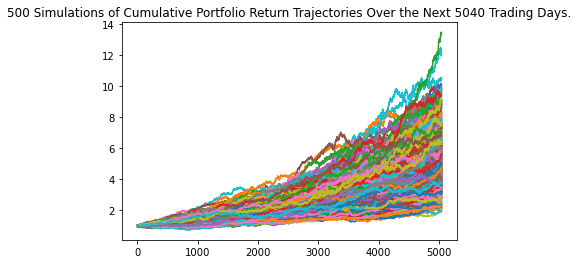

In [25]:
# Line plot for conservative monte carlo sim
line_plot_cons = MC_conservative.plot_simulation()

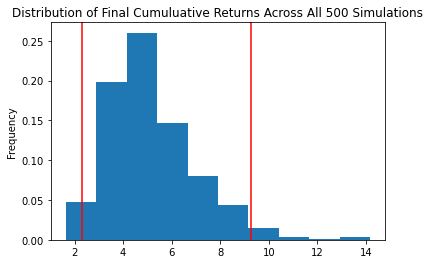

In [13]:
# Distribution plot for conservative monte carlo sim
dist_plot_cons = MC_conservative.plot_distribution()

In [107]:
# Summary statistics
tbl_conservative = MC_conservative.summarize_cumulative_return()
print(tbl_conservative)

count           500.000000
mean              5.157960
std               1.758223
min               1.914043
25%               3.899604
50%               4.806215
75%               6.204868
max              13.374315
95% CI Lower      2.320871
95% CI Upper      9.125908
Name: 5040, dtype: float64


### Run monte carlo simulation on moderate portfolio

In [16]:
# Set timeframe to 1 day
timeframe = "1D"

# Set start and end dates
start_date = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-10', tz='America/New_York').isoformat()

# Get 6 years worth of price data
moderate_data = api.get_barset(
    moderate_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

In [17]:
# Clean data
moderate_data = moderate_data.dropna()
moderate_data.head()

BND                                       VB  \
                            open   high     low  close     volume    open   
time                                                                        
2017-11-21 00:00:00-05:00  81.73  81.79  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.89  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.88  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.89  81.785  81.82  1291927.0  145.88   
2017-11-28 00:00:00-05:00  81.90  81.95  81.830  81.84  1726448.0  145.52   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   
2017-11-28 00:00:00-05:00  146.9100  145.2801  146.87  245509.0  ...  45.39   

                                                               VXUS         \
                            high      low  close      volume   open   high   
time                                                                         
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63   9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75   6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59   6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11   9015959.0  56.59  56.59   
2017-11-28 00:00:00-05:00  45.54  45.2300  45.40  10536681.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [39]:
# Define monte carlo sim for moderate portfolio
MC_mod = MCSimulation(
    portfolio_data = moderate_data,
    weights = mod_weights,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [18]:
# Run monte carlo sim 
MC_mod.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009684,1.001416,1.003897,0.993138,0.997126,1.006342,0.998318,0.998026,0.994355,1.009179,...,0.999451,0.992820,1.002612,0.989181,0.995611,0.997525,0.995138,0.998654,1.002782,1.010470
2,1.007827,0.996114,0.999723,0.993661,0.997702,1.011519,0.996652,0.997071,1.001357,1.016852,...,1.002277,1.002408,1.002299,0.986760,0.996004,0.994038,1.000562,1.000548,0.997324,1.008640
3,1.012388,0.992453,0.999158,0.996392,0.998587,1.009661,0.994488,0.988933,0.990735,1.022169,...,1.006486,1.003323,1.009158,1.000917,1.001114,0.998601,0.997347,0.996881,1.000119,1.012964
4,1.004597,0.992406,1.000680,0.992630,0.998379,1.015098,0.997588,0.983589,0.993763,1.032673,...,1.018900,0.997753,1.008633,1.004715,1.003531,0.993870,0.993691,0.994803,0.993055,1.010584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,9.494270,4.592048,5.457095,4.418043,5.204541,5.331138,9.395069,3.393191,6.937436,11.571864,...,6.936323,4.775628,6.179041,13.766331,8.990994,5.667337,7.278924,9.184533,10.350633,6.461438
5037,9.499907,4.582377,5.468224,4.408503,5.203960,5.359128,9.382481,3.421174,6.917614,11.644910,...,6.916812,4.801410,6.166940,13.806374,9.047262,5.607325,7.286244,9.238017,10.312178,6.403537
5038,9.541902,4.565664,5.454463,4.410975,5.153252,5.389169,9.352530,3.416830,7.007939,11.572040,...,7.018458,4.831314,6.179745,13.806055,9.049445,5.619638,7.279802,9.249910,10.288310,6.412145
5039,9.580034,4.551469,5.379805,4.429317,5.115304,5.418420,9.305629,3.421770,6.967353,11.614594,...,7.033382,4.842003,6.219614,13.783197,8.989721,5.616172,7.306530,9.266689,10.193085,6.379477


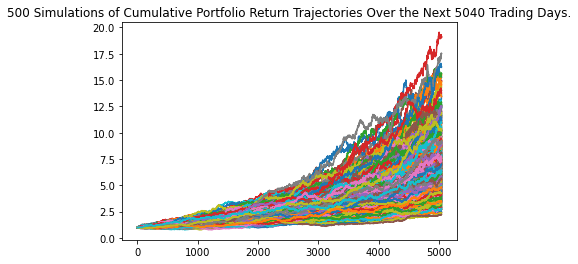

In [19]:
# Line plot for moderate monte carlo sim
line_plot_mod = MC_mod.plot_simulation()

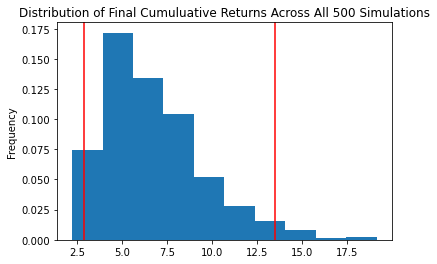

In [20]:
# Distribution plot
dist_plot_mod = MC_mod.plot_distribution()

In [21]:
# Summary statistics
tbl_moderate = MC_mod.summarize_cumulative_return()
print(tbl_moderate)

count           500.000000
mean              6.730327
std               2.759140
min               2.234660
25%               4.641611
50%               6.108594
75%               8.216616
max              19.127019
95% CI Lower      2.872637
95% CI Upper     13.500437
Name: 5040, dtype: float64


### Run monte carlo simulation on aggressive portfolio 

In [18]:
# Set timeframe to 1 day
timeframe = "1D"

# Set start and end dates
start_date = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-10', tz='America/New_York').isoformat()

# Get 6 years worth of price data
aggressive_data = api.get_barset(
    aggressive_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


In [19]:
# Clean data
aggressive_data = aggressive_data.dropna()
aggressive_data.head()

BND                                       VB  \
                            open   high     low  close     volume    open   
time                                                                        
2017-11-21 00:00:00-05:00  81.73  81.79  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.89  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.88  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.89  81.785  81.82  1291927.0  145.88   
2017-11-28 00:00:00-05:00  81.90  81.95  81.830  81.84  1726448.0  145.52   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   
2017-11-28 00:00:00-05:00  146.9100  145.2801  146.87  245509.0  ...  45.39   

                                                               VXUS         \
                            high      low  close      volume   open   high   
time                                                                         
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63   9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75   6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59   6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11   9015959.0  56.59  56.59   
2017-11-28 00:00:00-05:00  45.54  45.2300  45.40  10536681.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [24]:
# Define Monte carlo sim for aggressive portfolio
MC_agg = MCSimulation(
    portfolio_data = aggressive_data,
    weights = agg_weights,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [25]:
# Run monte carlo
MC_agg.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996962,0.996314,0.999421,1.003789,1.002204,0.995938,0.992291,0.999374,1.001708,0.990830,...,1.007266,1.006008,1.000277,0.992855,0.993708,1.001003,1.004802,1.008374,0.995540,1.001687
2,0.988528,1.001615,0.988694,0.997009,1.003658,1.005490,0.993510,1.006412,0.997573,0.989785,...,1.000446,1.004068,1.003320,0.998093,0.992327,1.002807,1.008338,1.015979,0.994625,1.001440
3,0.980169,1.005261,0.994979,0.998892,0.996045,1.010403,0.988567,1.002258,0.999927,0.989408,...,1.013262,0.997938,1.006274,1.001386,0.990640,0.996677,1.024128,1.008911,1.001770,1.002333
4,0.971022,0.991053,0.991113,0.997841,1.006744,1.020317,1.000664,0.993066,1.003225,0.987668,...,1.004975,0.998033,1.005191,1.001369,0.999794,1.000886,1.017343,0.993812,1.015879,0.998117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,5.221661,7.742798,7.509262,6.708052,19.988679,12.225101,5.183032,5.521849,10.936645,5.320891,...,16.196898,11.870826,14.981070,8.288813,11.653606,6.467203,22.397334,22.130429,14.758547,9.183357
5037,5.220768,7.802346,7.477737,6.734087,19.951123,12.266279,5.172308,5.493253,10.871254,5.309249,...,16.262364,11.892574,14.936506,8.233058,11.636383,6.489899,22.302615,22.499688,14.733924,9.293277
5038,5.285167,7.882250,7.403755,6.735321,20.049242,12.401549,5.187345,5.470103,10.921574,5.372525,...,16.072822,11.814111,14.850790,8.173423,11.795971,6.443797,22.260661,22.799634,14.712476,9.393670
5039,5.286413,7.892637,7.439615,6.797459,19.985409,12.373743,5.189055,5.432256,10.940057,5.397154,...,16.050098,11.621938,15.077092,8.166358,11.772276,6.479656,22.407883,22.822046,14.705807,9.407423


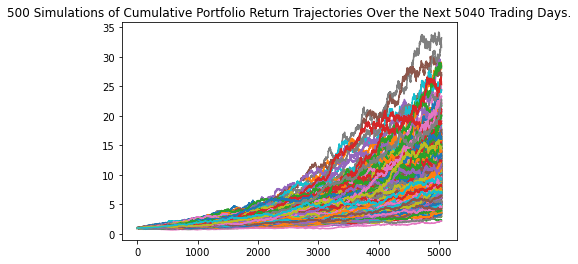

In [26]:
# Line plot for aggressive portfolio
line_plot_agg = MC_agg.plot_simulation()

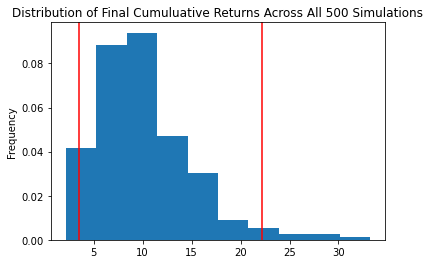

In [27]:
# Distribution plot
dist_plot_agg = MC_agg.plot_distribution()

In [28]:
# Summary Statistics
tbl_agg = MC_agg.summarize_cumulative_return()
print(tbl_agg)

count           500.000000
mean             10.188934
std               4.861752
min               2.148238
25%               6.889906
50%               9.304167
75%              12.451307
max              33.236770
95% CI Lower      3.535879
95% CI Upper     22.187631
Name: 5040, dtype: float64


### Find cumulative returns for Conservative portfolio since Jan 1, 2015

In [20]:
# Define weights and assets
conservative_tickers = ['BIV', 'BSV,' 'VB', 'VV', 'VXUS']
cons_weights = [.4, .1, .2 ,.25, .05]

In [23]:
# Delete extraneous columns 
cons_returns = conservative_data.drop([(
    'BIV', 'open'),
    ('BIV', 'high'),
    ('BIV', 'low'),
    ('BIV', 'volume'),
    ('BSV', 'open'),
    ('BSV', 'high'),
    ('BSV', 'low'),
    ('BSV', 'volume'),
    ('VXUS', 'open'),
    ('VXUS', 'high'),
    ('VXUS', 'low'),
    ('VXUS', 'volume'),
    ('VV', 'open'),
    ('VV', 'high'),
    ('VV', 'low'),
    ('VV', 'volume'),    
    ('VB', 'open'),
    ('VB', 'high'),
    ('VB', 'low'),
    ('VB', 'volume')
], axis = 1, inplace = True)

In [24]:
# Delete extraneous columns
cons_returns = conservative_data.rename(columns = {'BIV':'', 'BSV':'', 'VB':'', 'VV':'', 'VXUS':''})
cons_returns.head()

close   close   close   close  close
time                                                           
2017-11-21 00:00:00-05:00  84.21  79.360  145.50  119.42  56.23
2017-11-22 00:00:00-05:00  84.42  79.470  145.42  119.36  56.40
2017-11-24 00:00:00-05:00  84.38  79.445  145.58  119.61  56.69
2017-11-27 00:00:00-05:00  84.43  79.465  145.07  119.63  56.28
2017-11-28 00:00:00-05:00  84.49  79.460  146.87  120.71  56.60

In [25]:
# Rename columns
cons_returns.columns = ['BIV', 'BSV', 'VB', 'VV', 'VZUS']

In [26]:
# Find percentage change
cons_returns = cons_returns.pct_change()
cons_returns.head()

,BIV,BSV,VB,VV,VZUS
time,,,,,
2017-11-21 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN
2017-11-22 00:00:00-05:00,0.002494,0.001386,-0.000550,-0.000502,0.003023
2017-11-24 00:00:00-05:00,-0.000474,-0.000315,0.001100,0.002095,0.005142
2017-11-27 00:00:00-05:00,0.000593,0.000252,-0.003503,0.000167,-0.007232
2017-11-28 00:00:00-05:00,0.000711,-0.000063,0.012408,0.009028,0.005686


In [27]:
# Calculate cummulative return
conservative_returns_combined = cons_returns.dot(cons_weights)

In [28]:
# Find overal portfolio returns
conservative_returns_combined

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.001052
2017-11-24 00:00:00-05:00    0.000780
2017-11-27 00:00:00-05:00   -0.000758
2017-11-28 00:00:00-05:00    0.005301
                               ...   
2021-11-04 00:00:00-04:00    0.002031
2021-11-05 00:00:00-04:00    0.004749
2021-11-08 00:00:00-05:00   -0.000513
2021-11-09 00:00:00-05:00   -0.000101
2021-11-10 00:00:00-05:00   -0.008831
Length: 998, dtype: float64

<AxesSubplot:title={'center':'Conservative portfolio daily returns'}, xlabel='Date', ylabel='Daily Return'>

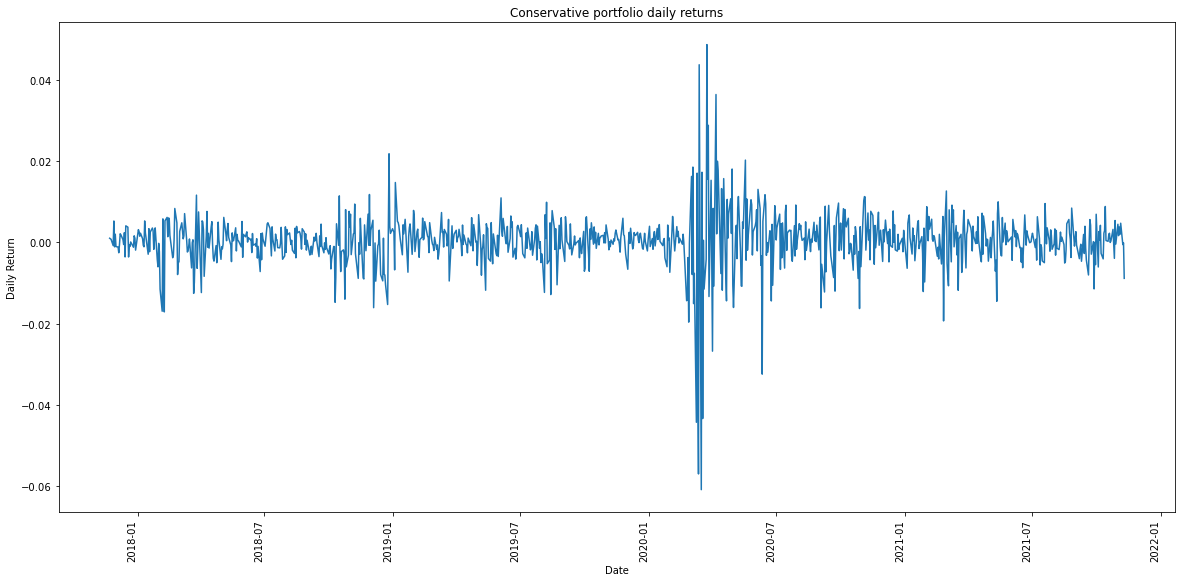

In [34]:
# Plot conservative returns
conservative_returns_combined.plot(xlabel = "Date", ylabel = "Daily Return", rot=90, figsize = [20,10], title = "Conservative portfolio daily returns")

In [29]:
# Find cumulative returns for conservative portfolio and plot
conservative_cumulative_returns = (1 + conservative_returns_combined).cumprod() - 1
conservative_cumulative_returns_plot = conservative_cumulative_returns.hvplot(title = "Conservative Portfolio Returns", xlabel = "Date", ylabel = "% Return")
conservative_cumulative_returns_plot

:Curve   [time]   (0)

In [30]:
conservative_cumulative_returns

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.001052
2017-11-24 00:00:00-05:00    0.001832
2017-11-27 00:00:00-05:00    0.001073
2017-11-28 00:00:00-05:00    0.006379
                               ...   
2021-11-04 00:00:00-04:00    0.362183
2021-11-05 00:00:00-04:00    0.368652
2021-11-08 00:00:00-05:00    0.367950
2021-11-09 00:00:00-05:00    0.367812
2021-11-10 00:00:00-05:00    0.355733
Length: 998, dtype: float64

### Find cumulative returns for moderate portfolio since Jan 1, 2015

In [31]:
# Define assets and weights
moderate_tickers = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
mod_weights = [.3, .25, .25, .05, .15]
moderate_data.head()

BND                                       VB  \
                            open   high     low  close     volume    open   
time                                                                        
2017-11-21 00:00:00-05:00  81.73  81.79  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.89  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.88  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.89  81.785  81.82  1291927.0  145.88   
2017-11-28 00:00:00-05:00  81.90  81.95  81.830  81.84  1726448.0  145.52   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   
2017-11-28 00:00:00-05:00  146.9100  145.2801  146.87  245509.0  ...  45.39   

                                                               VXUS         \
                            high      low  close      volume   open   high   
time                                                                         
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63   9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75   6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59   6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11   9015959.0  56.59  56.59   
2017-11-28 00:00:00-05:00  45.54  45.2300  45.40  10536681.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [32]:
# Drop extraneous columns
moderate_returns = moderate_data.drop([(
    'VV', 'open'),
    ('VV', 'high'),
    ('VV', 'low'),
    ('VV', 'volume'),
    ('VB', 'open'),
    ('VB', 'high'),
    ('VB', 'low'),
    ('VB', 'volume'),
    ('VXUS', 'open'),
    ('VXUS', 'high'),
    ('VXUS', 'low'),
    ('VXUS', 'volume'),
    ('VWO', 'open'),
    ('VWO', 'high'),
    ('VWO', 'low'),
    ('VWO', 'volume'),    
    ('BND', 'open'),
    ('BND', 'high'),
    ('BND', 'low'),
    ('BND', 'volume')
], axis = 1, inplace = True)

In [33]:
# Drop extraneous columns
moderate_returns = moderate_data.rename(columns = {'VV':'', 'VB':'', 'VXUS':'', 'VWO':'', 'BND':''})

In [34]:
# Rename columns
moderate_returns.columns = ['VV', 'VB', 'VXUS', 'VWO', 'BND']
moderate_returns.head()

,VV,VB,VXUS,VWO,BND
time,,,,,
2017-11-21 00:00:00-05:00,81.69,145.50,119.42,45.63,56.23
2017-11-22 00:00:00-05:00,81.88,145.42,119.36,45.75,56.40
2017-11-24 00:00:00-05:00,81.83,145.58,119.61,45.59,56.69
2017-11-27 00:00:00-05:00,81.82,145.07,119.63,45.11,56.28
2017-11-28 00:00:00-05:00,81.84,146.87,120.71,45.40,56.60


In [35]:
# Find percentage change of moderate portfolio
moderate_returns = moderate_returns.pct_change()

In [36]:
# Find total portfolio returns and plot
moderate_returns_combined = moderate_returns.dot(mod_weights)

<AxesSubplot:title={'center':'Moderate Portfolio Daily Returns'}, xlabel='Date', ylabel='Daily Return'>

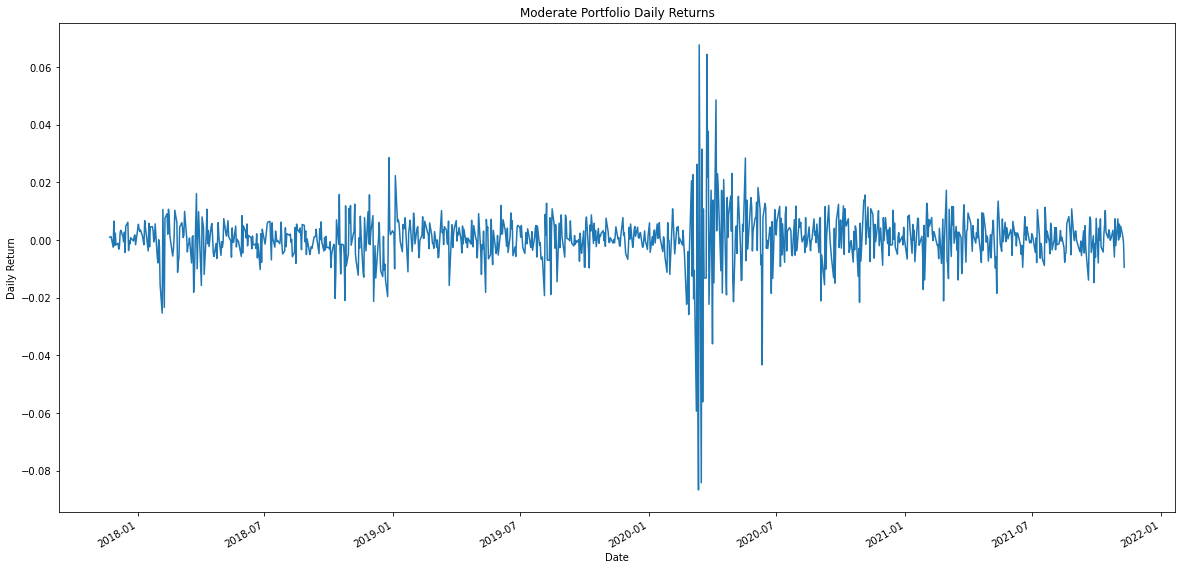

In [48]:
moderate_returns_combined.plot(title = "Moderate Portfolio Daily Returns", figsize = [20,10], xlabel = "Date", ylabel = "Daily Return")

In [37]:
# Find cumulative returns of moderate portfolio 
moderate_cumulative_returns = (1 + moderate_returns_combined).cumprod() - 1
moderate_cumulative_returns

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.001020
2017-11-24 00:00:00-05:00    0.002233
2017-11-27 00:00:00-05:00   -0.000255
2017-11-28 00:00:00-05:00    0.006350
                               ...   
2021-11-04 00:00:00-04:00    0.404534
2021-11-05 00:00:00-04:00    0.411291
2021-11-08 00:00:00-05:00    0.413133
2021-11-09 00:00:00-05:00    0.411840
2021-11-10 00:00:00-05:00    0.398518
Length: 998, dtype: float64

In [38]:
moderate_cumulative_returns_plot = moderate_cumulative_returns.hvplot(title = "Moderate Portfolio Returns", xlabel = "Date", ylabel = "% Return")
moderate_cumulative_returns_plot

:Curve   [time]   (0)

In [39]:
# Define assets and weights
aggressive_tickers = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
agg_weights = [.1, .30, .30 ,.1, .2]
aggressive_data.head()

BND                                       VB  \
                            open   high     low  close     volume    open   
time                                                                        
2017-11-21 00:00:00-05:00  81.73  81.79  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.89  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.88  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.89  81.785  81.82  1291927.0  145.88   
2017-11-28 00:00:00-05:00  81.90  81.95  81.830  81.84  1726448.0  145.52   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   
2017-11-28 00:00:00-05:00  146.9100  145.2801  146.87  245509.0  ...  45.39   

                                                               VXUS         \
                            high      low  close      volume   open   high   
time                                                                         
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63   9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75   6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59   6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11   9015959.0  56.59  56.59   
2017-11-28 00:00:00-05:00  45.54  45.2300  45.40  10536681.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [40]:
# Drop extraneous columns
aggressive_returns = aggressive_data.drop([(
    'BND', 'open'),
    ('BND', 'high'),
    ('BND', 'low'),
    ('BND', 'volume'),
    ('VB', 'open'),
    ('VB', 'high'),
    ('VB', 'low'),
    ('VB', 'volume'),
    ('VV', 'open'),
    ('VV', 'high'),
    ('VV', 'low'),
    ('VV', 'volume'),
    ('VWO', 'open'),
    ('VWO', 'high'),
    ('VWO', 'low'),
    ('VWO', 'volume'),    
    ('VXUS', 'open'),
    ('VXUS', 'high'),
    ('VXUS', 'low'),
    ('VXUS', 'volume')
], axis = 1, inplace = True)


In [41]:
# Drop extraneous columns
aggressive_returns = aggressive_data.rename(columns = {'VV':'', 'VB':'', 'VXUS':'', 'VWO':'', 'BND':''})

In [42]:
# Rename columns
aggressive_returns.columns = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
aggressive_returns.head()

,BND,VB,VV,VWO,VXUS
time,,,,,
2017-11-21 00:00:00-05:00,81.69,145.50,119.42,45.63,56.23
2017-11-22 00:00:00-05:00,81.88,145.42,119.36,45.75,56.40
2017-11-24 00:00:00-05:00,81.83,145.58,119.61,45.59,56.69
2017-11-27 00:00:00-05:00,81.82,145.07,119.63,45.11,56.28
2017-11-28 00:00:00-05:00,81.84,146.87,120.71,45.40,56.60


In [43]:
# Find returns of aggressive portfolio
aggressive_returns = aggressive_returns.pct_change()

In [44]:
# Find returns for total portfolio and plot
aggressive_returns_combined = aggressive_returns.dot(agg_weights)

In [45]:
aggressive_returns_combined.head()

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.000785
2017-11-24 00:00:00-05:00    0.001576
2017-11-27 00:00:00-05:00   -0.003512
2017-11-28 00:00:00-05:00    0.008235
dtype: float64

<AxesSubplot:title={'center':'Aggressive Portfolio Daily Returns'}, xlabel='Date', ylabel='Daily Return'>

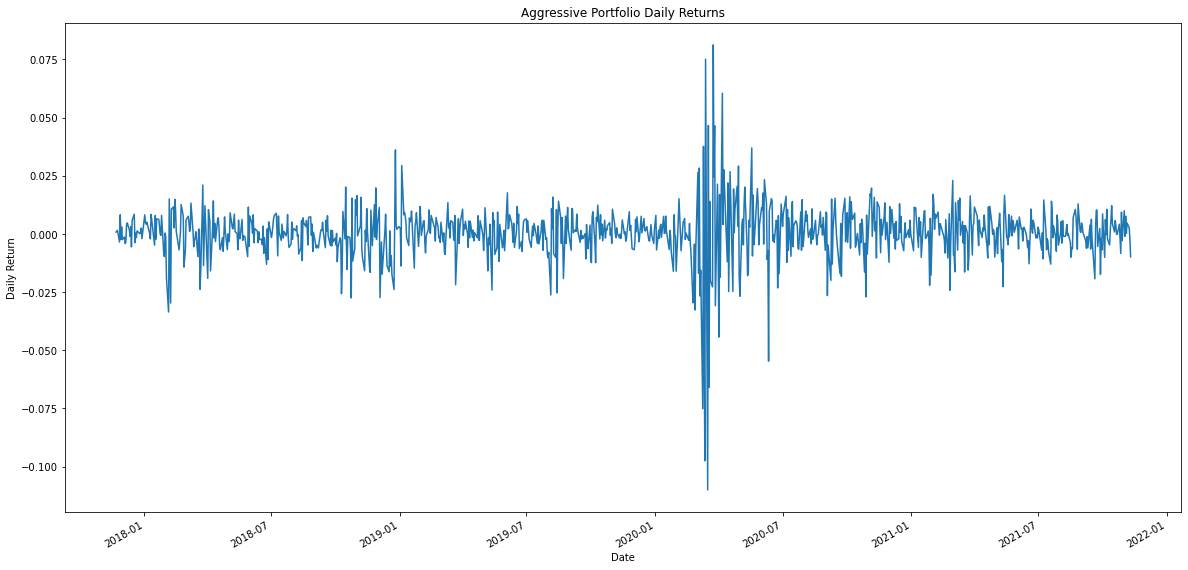

In [58]:
aggressive_returns_combined.plot(title = "Aggressive Portfolio Daily Returns", figsize = [20,10], xlabel = "Date", ylabel = "Daily Return")

In [46]:
# Find cumulative returns of aggressive portfolio and plot
aggressive_cumulative_returns = (1 + aggressive_returns_combined).cumprod() - 1
aggressive_cumulative_returns

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.000785
2017-11-24 00:00:00-05:00    0.002362
2017-11-27 00:00:00-05:00   -0.001159
2017-11-28 00:00:00-05:00    0.007067
                               ...   
2021-11-04 00:00:00-04:00    0.476898
2021-11-05 00:00:00-04:00    0.483840
2021-11-08 00:00:00-05:00    0.487736
2021-11-09 00:00:00-05:00    0.484738
2021-11-10 00:00:00-05:00    0.470106
Length: 998, dtype: float64

In [60]:
aggressive_returns_combined_plot = aggressive_cumulative_returns.hvplot(title = "Aggressive Portfolio Returns", xlabel = "Date", ylabel = "% Return")
aggressive_returns_combined_plot

:Curve   [time]   (0)

In [96]:
all_crypto_portfolios_plot = conservative_cumulative_returns.hvplot() * moderate_cumulative_returns.hvplot() * aggressive_cumulative_returns.hvplot()
all_crypto_portfolios_plot

:Overlay
   .Curve.A_0.I   :Curve   [time]   (0)
   .Curve.A_0.II  :Curve   [time]   (0)
   .Curve.A_0.III :Curve   [time]   (0)

## Portfolio Beta. Find and plot Beta and Sharpe Ratios for all portfolios

In [55]:
# Call conservative portfolio csv
cons_csv = Path("conservative_portfolio.csv")
conservative_csv = pd.read_csv(cons_csv, index_col="Date")
conservative_csv

,BIV,BSV,VB,VV,VXUS
Date,,,,,
1/2/2015 16:00,84.87,79.95,116.28,94.31,48.21
1/5/2015 16:00,85.19,80.02,114.49,92.69,47.15
1/6/2015 16:00,85.57,80.09,113.03,91.79,46.79
1/7/2015 16:00,85.60,80.16,114.39,92.83,47.34
1/8/2015 16:00,85.44,80.17,116.21,94.58,47.94
...,...,...,...,...,...
11/3/2021 16:00,88.77,81.47,237.49,217.62,65.81
11/4/2021 16:00,89.07,81.57,236.45,218.55,65.74
11/5/2021 16:00,89.49,81.66,238.81,219.18,65.88


In [56]:
# Call SP500 closing data csv
sp500_csv = Path('sp500.csv')
sp500_data = pd.read_csv(sp500_csv, index_col = "Date")
sp500_change= sp500_data.pct_change()
sp500_change

,Close
Date,
1/2/2015 16:00,NaN
1/5/2015 16:00,-0.018278
1/6/2015 16:00,-0.008893
1/7/2015 16:00,0.011630
1/8/2015 16:00,0.017888
...,...
11/3/2021 16:00,0.006461
11/4/2021 16:00,0.004182
11/5/2021 16:00,0.003733


In [57]:
# Find the daily percent change of the conservative portfolio
conservative_change= conservative_csv.pct_change()
conservative_change

,BIV,BSV,VB,VV,VXUS
Date,,,,,
1/2/2015 16:00,NaN,NaN,NaN,NaN,NaN
1/5/2015 16:00,0.003770,0.000876,-0.015394,-0.017177,-0.021987
1/6/2015 16:00,0.004461,0.000875,-0.012752,-0.009710,-0.007635
1/7/2015 16:00,0.000351,0.000874,0.012032,0.011330,0.011755
1/8/2015 16:00,-0.001869,0.000125,0.015910,0.018852,0.012674
...,...,...,...,...,...
11/3/2021 16:00,-0.001350,-0.000123,0.013053,0.006615,0.006577
11/4/2021 16:00,0.003380,0.001227,-0.004379,0.004274,-0.001064
11/5/2021 16:00,0.004715,0.001103,0.009981,0.002883,0.002130


In [58]:
# Find total conservative portfolio returns
cons_weights = [.4, .1, .2 ,.25, .05]
conservative_returns_combined = conservative_change.dot(cons_weights)
conservative_returns_combined

Date
1/2/2015 16:00          NaN
1/5/2015 16:00    -0.006877
1/6/2015 16:00    -0.003488
1/7/2015 16:00     0.006054
1/8/2015 16:00     0.007794
                     ...   
11/3/2021 16:00    0.004041
11/4/2021 16:00    0.001614
11/5/2021 16:00    0.004820
11/8/2021 16:00   -0.000505
11/9/2021 16:00   -0.000268
Length: 1727, dtype: float64

In [59]:
# Find conservative covariance
conservative_covariance = conservative_returns_combined.cov(sp500_change['Close'])
conservative_covariance

6.280118315813372e-05

In [60]:
mod_csv = Path("moderate_portfolio.csv")
moderate_csv = pd.read_csv(mod_csv, index_col="Date")

In [61]:
moderate_change= moderate_csv.pct_change()

In [62]:
# Find total moderate portfolio returns
mod_weights = [.3, .25, .25, .05, .15]
moderate_returns_combined = moderate_change.dot(mod_weights)
moderate_returns_combined

Date
1/2/2015 16:00          NaN
1/5/2015 16:00    -0.011366
1/6/2015 16:00    -0.006136
1/7/2015 16:00     0.008933
1/8/2015 16:00     0.010968
                     ...   
11/3/2021 16:00    0.005742
11/4/2021 16:00    0.001080
11/5/2021 16:00    0.004466
11/8/2021 16:00    0.001434
11/9/2021 16:00   -0.001173
Length: 1727, dtype: float64

In [63]:
# Find moderate covariance
moderate_covariance = moderate_returns_combined.cov(sp500_change['Close'])
moderate_covariance

8.86339291576764e-05

In [51]:
# Find total aggresive portfolio returns
agg_weights = [.1, .30, .30 ,.1, .2]
aggressive_returns_combined = moderate_change.dot(agg_weights)
aggressive_returns_combined

Date
1/2/2015 16:00          NaN
1/5/2015 16:00    -0.015471
1/6/2015 16:00    -0.008464
1/7/2015 16:00     0.011717
1/8/2015 16:00     0.014498
                     ...   
11/3/2021 16:00    0.007771
11/4/2021 16:00   -0.000002
11/5/2021 16:00    0.004628
11/8/2021 16:00    0.002777
11/9/2021 16:00   -0.002290
Length: 1727, dtype: float64

In [76]:
# Find aggressive covariance
aggressive_covariance = aggressive_returns_combined.cov(sp500_change['Close'])
aggressive_covariance

0.0001130353653598525

In [211]:
# Calculate the variance of the SP500
variance = sp500_change['Close'].var()
variance

0.0001287044007563433

In [212]:
# Calculate beta of conservative portfolio
conservative_beta = conservative_covariance/variance
conservative_beta

0.4879489962198399

In [213]:
# Calculate beta of moderate portfolio
moderate_beta = moderate_covariance/variance
moderate_beta

0.6886627701680045

In [214]:
# Calculate beta of aggressive portfolio
aggressive_beta = aggressive_covariance/variance
aggressive_beta

0.8782556361366801

## Calculate Sharpe Ratios

In [216]:
# Import numpy
import numpy as np

In [101]:
# Define risk free rate of return
rf_rate = 0.0158/365
print(rf_rate)

4.3287671232876716e-05


In [102]:
# Calculate conservative portfolio sharpe ratio
conservative_sharpe_ratio = ((conservative_returns_combined.mean() - rf_rate)/ (conservative_returns_combined.std() * np.sqrt(252)))
conservative_sharpe_ratio

0.0024166577955796608

In [103]:
# Calculate moderate portfolio sharpe ratio
moderate_sharpe_ratio = ((moderate_returns_combined.mean() - rf_rate)/ (moderate_returns_combined.std() * np.sqrt(252)))
moderate_sharpe_ratio

0.002150552680991885

In [104]:
# Calculate aggressive portfolio sharpe ratio
aggressive_sharpe_ratio = ((aggressive_returns_combined.mean() - rf_rate)/ (aggressive_returns_combined.std() * np.sqrt(252)))
aggressive_sharpe_ratio

0.002191834922885446

## Establish allocations of digital assets in our custom portfolios for the conservative, moderate, and aggressive investors

In [67]:
# Define assets and weights for conservative portfolio with 2% digital assets
conservative_tickers_crypto = ['ETH', 'BTC', 'BIV', 'BSV,' 'VB', 'VV', 'VXUS']
cons_weights_crypto = [.01, .01, .38, .1, .2 ,.25, .05]

In [69]:
csv_cons_combined = Path("Conservative_Combined_Porfolio.csv")
csv_cons_crypto = pd.read_csv(csv_cons_combined, index_col="Date",infer_datetime_format=True, parse_dates=True)
csv_cons_crypto.head()

,ETH,BTC,BIV,BSV,VB,VV,VXUS
Date,,,,,,,
2016-10-14,11.92,638.03,86.76,80.48,118.82,97.59,46.15
2016-10-15,11.95,638.16,NaN,NaN,NaN,NaN,NaN
2016-10-16,11.95,641.92,NaN,NaN,NaN,NaN,NaN
2016-10-17,11.96,639.56,86.94,80.60,118.61,97.30,46.06
2016-10-18,12.54,635.11,87.09,80.62,119.30,97.89,46.61


In [70]:
cons_combined_MC = csv_cons_crypto

newcols = [
    ("ETH", "close"), 
    ("BTC", "close"),
    ("BIV", "close"),
    ("BSV", "close"),
    ("VB", "close"),
    ("VV", "close"),
    ("VXUS", "close"),
]
cons_combined_MC.columns = pd.MultiIndex.from_tuples(newcols)
cons_combined_MC = cons_combined_MC.dropna()
cons_combined_MC.head()

,ETH,BTC,BIV,BSV,VB,VV,VXUS
,close,close,close,close,close,close,close
Date,,,,,,,
2016-10-14,11.92,638.03,86.76,80.48,118.82,97.59,46.15
2016-10-17,11.96,639.56,86.94,80.60,118.61,97.30,46.06
2016-10-18,12.54,635.11,87.09,80.62,119.30,97.89,46.61
2016-10-19,12.01,629.79,87.17,80.62,119.81,98.13,46.77
2016-10-20,12.06,628.05,87.06,80.60,119.43,98.04,46.75


## Define assets and weights for moderate portfolio with 5% digital assets

In [71]:
# Define assets and weights for moderate portfolio
moderate_tickers_crypto = ['ETH', 'BTC', 'BND', 'VB', 'VV', 'VWO', 'VXUS']
mod_weights_crypto = [.025, .025, .3, .225, .225, .05, .15]

In [74]:
csv_mod_combined = Path("Moderate_Combined.csv")
csv_mod_crypto = pd.read_csv(csv_mod_combined, index_col="Date",infer_datetime_format=True, parse_dates=True)
csv_mod_crypto.head()

,ETH,BTC,BND,VB,VV,VWO,VXUS
Date,,,,,,,
2016-10-14,11.92,638.03,83.27,118.82,97.59,37.32,46.15
2016-10-15,11.95,638.16,NaN,NaN,NaN,NaN,NaN
2016-10-16,11.95,641.92,NaN,NaN,NaN,NaN,NaN
2016-10-17,11.96,639.56,83.45,118.61,97.30,37.25,46.06
2016-10-18,12.54,635.11,83.56,119.30,97.89,37.91,46.61


In [75]:
# Change to multi index
mod_combined_MC = csv_mod_crypto

newcols = [
    ("ETH", "close"), 
    ("BTC", "close"),
    ("BND", "close"),
    ("VB", "close"),
    ("VV", "close"),
    ("VWO", "close"),
    ("VXUS", "close"),
]
mod_combined_MC.columns = pd.MultiIndex.from_tuples(newcols)
mod_combined_MC = mod_combined_MC.dropna()
mod_combined_MC.head()

,ETH,BTC,BND,VB,VV,VWO,VXUS
,close,close,close,close,close,close,close
Date,,,,,,,
2016-10-14,11.92,638.03,83.27,118.82,97.59,37.32,46.15
2016-10-17,11.96,639.56,83.45,118.61,97.30,37.25,46.06
2016-10-18,12.54,635.11,83.56,119.30,97.89,37.91,46.61
2016-10-19,12.01,629.79,83.62,119.81,98.13,38.11,46.77
2016-10-20,12.06,628.05,83.57,119.43,98.04,38.06,46.75


### Define assets and weights for aggressive portfolio with 10% digital assets

In [76]:
# Define assets and weights for moderate portfolio
aggressive = ['ETH', 'BTC', 'BND', 'VB', 'VV', 'VWO', 'VXUS']
agg_weights_crypto = [.05, .05, .3, .20, .20, .05, .15]

# Find cumulative returns for all 3 portfolios with digital assets

### Cumalitive returns of conservative portfolio with crypto

In [77]:
# Find percentage change
cons_returns_crypto = cons_combined_MC.pct_change()
cons_returns_crypto.head()

,ETH,BTC,BIV,BSV,VB,VV,VXUS
,close,close,close,close,close,close,close
Date,,,,,,,
2016-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-17,0.003356,0.002398,0.002075,0.001491,-0.001767,-0.002972,-0.001950
2016-10-18,0.048495,-0.006958,0.001725,0.000248,0.005817,0.006064,0.011941
2016-10-19,-0.042265,-0.008377,0.000919,0.000000,0.004275,0.002452,0.003433
2016-10-20,0.004163,-0.002763,-0.001262,-0.000248,-0.003172,-0.000917,-0.000428


In [78]:
# Calculate cummulative return
cons_cummulative_returns_crypto = cons_returns_crypto.dot(cons_weights_crypto)
cons_cummulative_returns_crypto.head()

Date
2016-10-14         NaN
2016-10-17   -0.000199
2016-10-18    0.004372
2016-10-19    0.001482
2016-10-20   -0.001375
dtype: float64

<AxesSubplot:title={'center':'Combined Conservative portfolio daily returns'}, xlabel='Date', ylabel='Daily Return'>

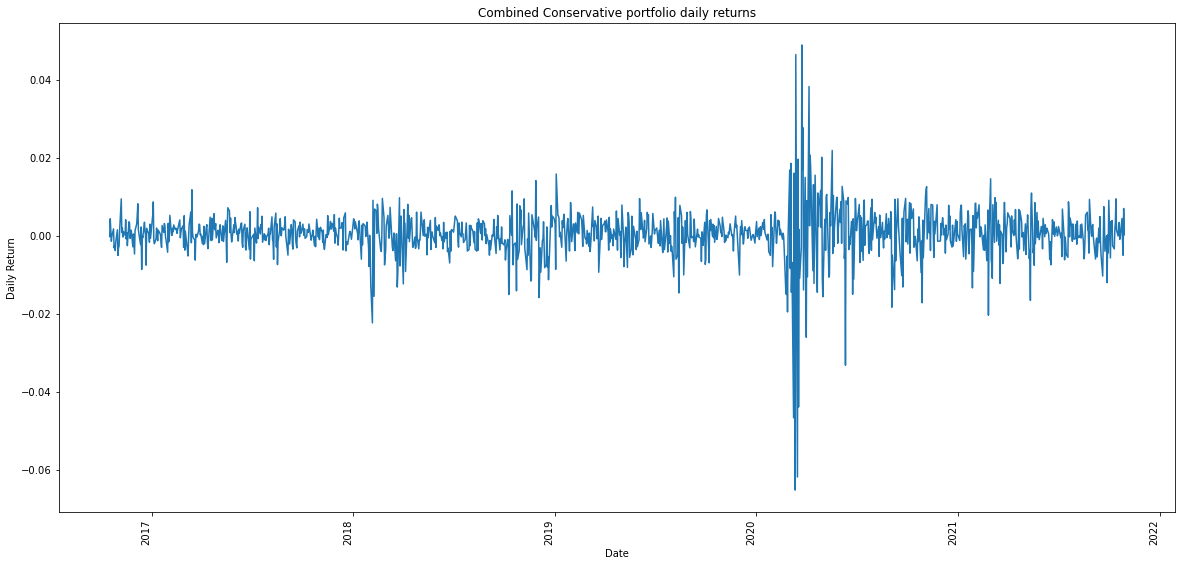

In [70]:
# Plot conservative returns
cons_cummulative_returns_crypto.plot(xlabel = "Date", ylabel = "Daily Return", rot=90, figsize = [20,10], title = "Combined Conservative portfolio daily returns")

In [79]:
# Find cumulative returns for conservative portfolio with crypto and plot
conservative_crypto_cumulative_returns = (1 + cons_cummulative_returns_crypto).cumprod() - 1
conservative_crypto_cumulative_returns_plot = conservative_crypto_cumulative_returns.hvplot(title = "Conservative Crypto Portfolio Returns", xlabel = "Date", ylabel = "% Return")
conservative_crypto_cumulative_returns_plot

:Curve   [Date]   (0)

In [80]:
conservative_crypto_cumulative_returns

Date
2016-10-14         NaN
2016-10-17   -0.000199
2016-10-18    0.004173
2016-10-19    0.005661
2016-10-20    0.004278
                ...   
2021-10-25    0.704369
2021-10-26    0.702015
2021-10-27    0.693527
2021-10-28    0.705414
2021-10-29    0.705863
Length: 1262, dtype: float64

### Cumalitive returns of moderate portfolio with crypto

In [81]:
# Find percentage change
mod_returns_crypto = mod_combined_MC.pct_change()
mod_returns_crypto.head()

,ETH,BTC,BND,VB,VV,VWO,VXUS
,close,close,close,close,close,close,close
Date,,,,,,,
2016-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-17,0.003356,0.002398,0.002162,-0.001767,-0.002972,-0.001876,-0.001950
2016-10-18,0.048495,-0.006958,0.001318,0.005817,0.006064,0.017718,0.011941
2016-10-19,-0.042265,-0.008377,0.000718,0.004275,0.002452,0.005276,0.003433
2016-10-20,0.004163,-0.002763,-0.000598,-0.003172,-0.000917,-0.001312,-0.000428


In [82]:
# Calculate cummulative return
mod_cummulative_returns_crypto = mod_returns_crypto.dot(mod_weights_crypto)
mod_cummulative_returns_crypto.head()

Date
2016-10-14         NaN
2016-10-17   -0.000660
2016-10-18    0.006784
2016-10-19    0.001242
2016-10-20   -0.001194
dtype: float64

<AxesSubplot:title={'center':'Combined Moderate portfolio daily returns'}, xlabel='Date', ylabel='Daily Return'>

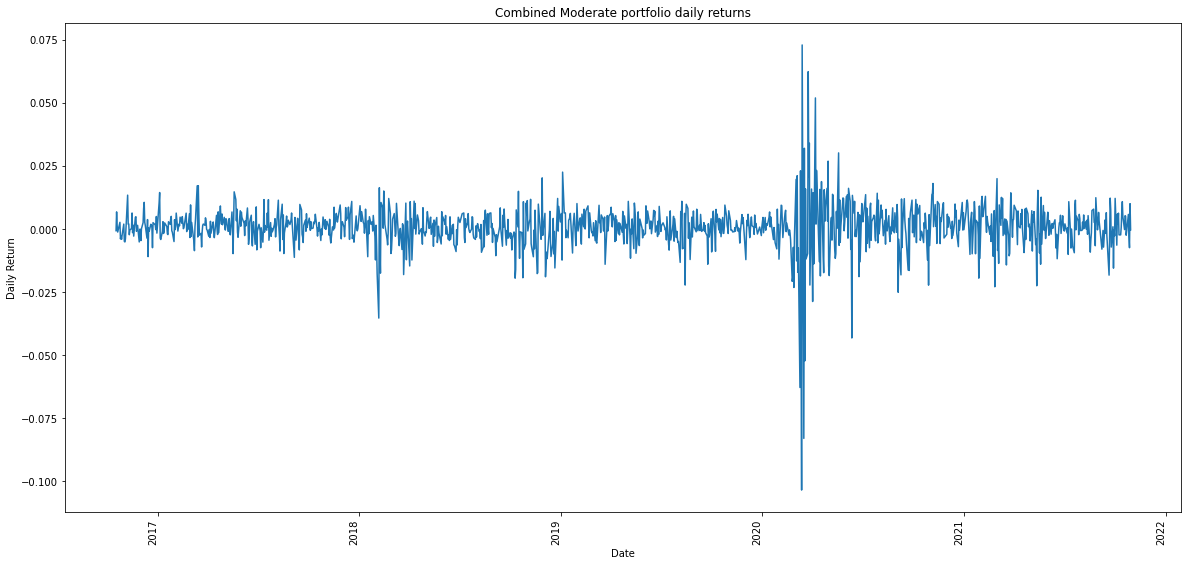

In [76]:
# Plot moderate returns
mod_cummulative_returns_crypto.plot(xlabel = "Date", ylabel = "Daily Return", rot=90, figsize = [20,10], title = "Combined Moderate portfolio daily returns")

In [83]:
# Find cumulative returns for moderate portfolio with crypto and plot
moderate_crypto_cumulative_returns = (1 + mod_cummulative_returns_crypto).cumprod() - 1
moderate_crypto_cumulative_returns_plot = moderate_crypto_cumulative_returns.hvplot(title = "Moderate Crypto Portfolio Returns", xlabel = "Date", ylabel = "% Return")
moderate_crypto_cumulative_returns_plot

:Curve   [Date]   (0)

In [84]:
moderate_crypto_cumulative_returns

Date
2016-10-14         NaN
2016-10-17   -0.000660
2016-10-18    0.006119
2016-10-19    0.007369
2016-10-20    0.006166
                ...   
2021-10-25    1.213168
2021-10-26    1.207037
2021-10-27    1.190696
2021-10-28    1.212700
2021-10-29    1.212016
Length: 1261, dtype: float64

### Cumalitive returns of aggressive portfolio with crypto

In [85]:
# Find percentage change
agg_returns_crypto = mod_combined_MC.pct_change()
agg_returns_crypto.head()

,ETH,BTC,BND,VB,VV,VWO,VXUS
,close,close,close,close,close,close,close
Date,,,,,,,
2016-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-17,0.003356,0.002398,0.002162,-0.001767,-0.002972,-0.001876,-0.001950
2016-10-18,0.048495,-0.006958,0.001318,0.005817,0.006064,0.017718,0.011941
2016-10-19,-0.042265,-0.008377,0.000718,0.004275,0.002452,0.005276,0.003433
2016-10-20,0.004163,-0.002763,-0.000598,-0.003172,-0.000917,-0.001312,-0.000428


In [86]:
# Calculate cummulative return
agg_cummulative_returns_crypto = agg_returns_crypto.dot(agg_weights_crypto)
agg_cummulative_returns_crypto.head()

Date
2016-10-14         NaN
2016-10-17   -0.000398
2016-10-18    0.007526
2016-10-19   -0.000193
2016-10-20   -0.001057
dtype: float64

<AxesSubplot:title={'center':'Combined Aggressive portfolio daily returns'}, xlabel='Date', ylabel='Daily Return'>

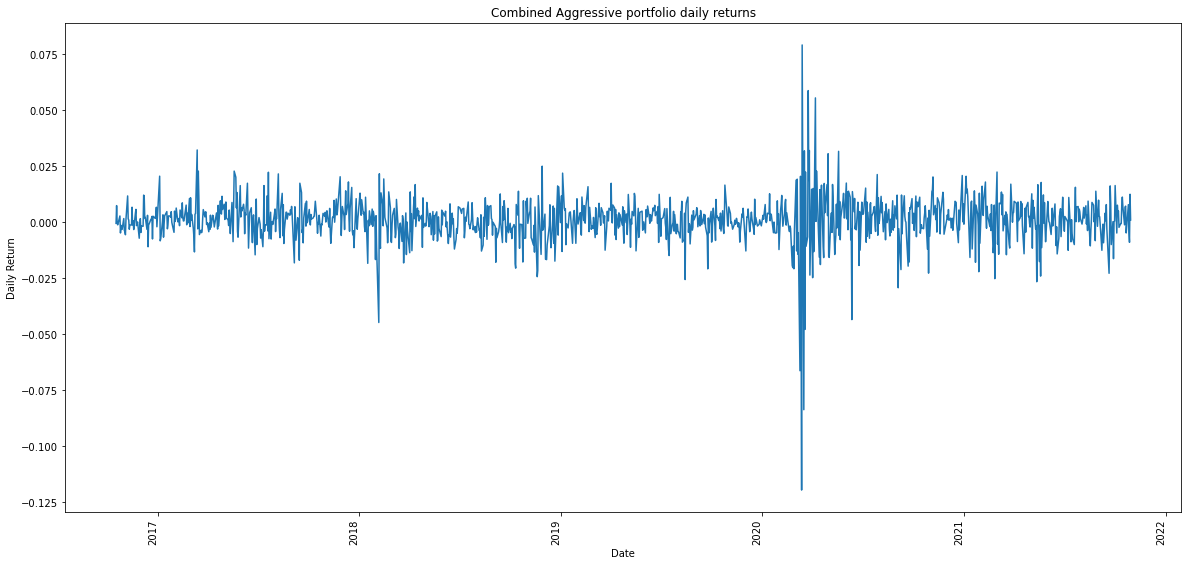

In [91]:
# Plot aggressive returns
agg_cummulative_returns_crypto.plot(xlabel = "Date", ylabel = "Daily Return", rot=90, figsize = [20,10], title = "Combined Aggressive portfolio daily returns")

In [87]:
# Find cumulative returns for aggressive portfolio with crypto and plot
aggressive_crypto_cumulative_returns = (1 + agg_cummulative_returns_crypto).cumprod() - 1
aggressive_crypto_cumulative_returns_plot = aggressive_crypto_cumulative_returns.hvplot(title = "Moderate Crypto Portfolio Returns", xlabel = "Date", ylabel = "% Return")
aggressive_crypto_cumulative_returns_plot

:Curve   [Date]   (0)

In [88]:
aggressive_crypto_cumulative_returns

Date
2016-10-14         NaN
2016-10-17   -0.000398
2016-10-18    0.007125
2016-10-19    0.006931
2016-10-20    0.005866
                ...   
2021-10-25    2.051274
2021-10-26    2.038663
2021-10-27    2.011698
2021-10-28    2.049624
2021-10-29    2.052983
Length: 1261, dtype: float64

In [126]:
conservative_crypto_cumulative_returns_plot * moderate_crypto_cumulative_returns_plot * aggressive_crypto_cumulative_returns_plot

:Overlay
   .Curve.A_0.I   :Curve   [Date]   (0)
   .Curve.A_0.II  :Curve   [Date]   (0)
   .Curve.A_0.III :Curve   [Date]   (0)

In [ ]:
# Plot portfolio returns

## Complete and plot monte carlo simulation for all portfolios 

### Monte Carlo for Conservative Portfolio with Crypto

In [102]:
# Define monte carlo simulation for conservative portfoio with digital assets
MC_conservative_combined = MCSimulation(
    portfolio_data = cons_combined_MC,
    weights = cons_weights_crypto,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [103]:
# Run monte carlo simulation
MC_conservative_combined.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997906,0.997144,1.006143,0.995852,0.999337,1.000483,0.998668,1.006128,1.001442,1.004477,...,0.996723,1.002248,1.004542,0.998619,1.006825,0.994955,1.004949,1.000284,1.002761,1.000637
2,0.997090,0.998594,1.008021,1.001215,1.000538,1.000717,0.993730,1.003129,1.004849,1.007363,...,0.998502,1.004310,1.009689,0.996974,1.019686,0.991877,1.008420,0.998177,1.000696,1.002067
3,0.998769,1.006248,1.016726,0.995698,0.996882,1.001452,0.999172,1.004825,1.002450,1.009338,...,1.001661,1.009130,1.014231,1.006669,1.017961,0.991628,1.006516,1.004989,1.001307,1.006407
4,1.000081,1.002469,1.020238,0.995689,0.996864,1.003173,1.007474,1.008966,1.000741,1.013250,...,1.005446,1.008356,1.016237,1.004595,1.010106,0.991585,1.010561,1.010451,1.003395,1.012739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,8.811688,6.450037,8.198149,6.609908,15.601595,8.416462,8.865923,8.455826,10.887795,12.992025,...,9.865334,6.891526,12.529950,10.187195,7.325283,7.869914,8.365606,8.847328,7.978522,7.769082
5037,8.812644,6.477344,8.202256,6.591681,15.528374,8.390755,8.896117,8.483506,10.946707,13.013620,...,9.816845,6.880014,12.515071,10.132566,7.269194,7.899558,8.318166,8.821923,7.996562,7.758220
5038,8.839781,6.425230,8.177663,6.600120,15.526095,8.386687,8.813206,8.528507,10.981031,12.982637,...,9.849951,6.832076,12.472296,10.112878,7.242725,7.960764,8.316904,8.832826,8.024994,7.831888
5039,8.819352,6.430832,8.160932,6.618158,15.489948,8.362134,8.763488,8.553275,10.952131,13.065239,...,9.862452,6.845366,12.405442,10.116403,7.230174,8.003354,8.343293,8.787234,7.982462,7.824993


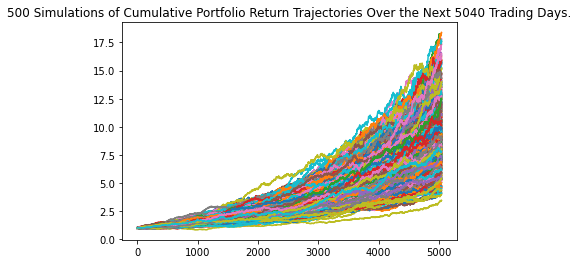

In [104]:
# Line plot for conservative monte carlo sim
line_plot_cons_crypto = MC_conservative_combined.plot_simulation()

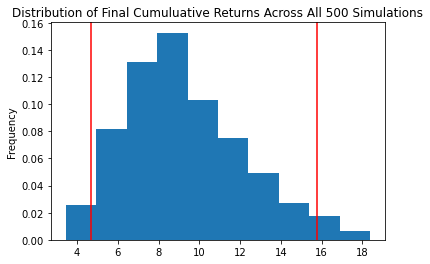

In [105]:
# Distribution plot for conservative monte carlo sim
dist_plot_cons = MC_conservative_combined.plot_distribution()

In [106]:
# Summary statistics
tbl_conservative_combined = MC_conservative_combined.summarize_cumulative_return()
print(tbl_conservative_combined)

count           500.000000
mean              9.275587
std               2.854311
min               3.444512
25%               7.220320
50%               8.833083
75%              11.095502
max              18.378614
95% CI Lower      4.664800
95% CI Upper     15.759547
Name: 5040, dtype: float64


### Monte Carlo for Moderate Portfolio with Crypto

In [108]:
# Define monte carlo simulation for conservative portfoio with digital assets
MC_moderate_combined = MCSimulation(
    portfolio_data = mod_combined_MC,
    weights = mod_weights_crypto,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [109]:
# Run monte carlo simulation
MC_moderate_combined.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999040,1.000931,0.998850,1.001379,1.001650,0.988396,1.000772,0.992092,1.004041,1.003768,...,1.000623,1.007582,0.998102,0.999174,0.986174,1.003009,0.995240,1.009811,1.004935,0.992434
2,1.002404,0.996831,1.007621,1.000470,1.002342,0.990834,0.995286,0.990467,1.003442,1.001994,...,1.005759,1.005458,0.999807,1.008871,0.993927,0.997772,1.006193,1.011367,1.007421,1.002077
3,1.000485,0.999869,1.000183,0.992491,1.004178,0.999769,0.996919,1.001352,1.001046,0.996957,...,1.004122,1.018239,0.994478,1.009295,0.996128,0.999847,1.007151,1.006856,1.008289,1.008885
4,1.002666,0.999719,0.999297,0.997314,1.006344,1.004593,1.001457,1.002817,1.006236,0.995043,...,1.009823,1.015224,0.996265,1.009132,0.997981,1.006571,1.004225,1.004652,1.010023,1.006011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,26.050796,19.717339,12.427829,21.977989,46.798889,15.562527,43.153828,27.265169,24.508574,22.389176,...,25.261365,49.367267,27.939038,20.279612,29.307114,22.378867,52.591182,26.815761,26.085016,40.650222
5037,25.986386,19.753221,12.423354,22.046341,46.905724,15.491623,43.168884,27.263625,24.687553,22.302169,...,25.446516,49.411485,27.778884,20.490479,29.713277,22.367568,52.931574,26.764763,26.112564,40.735429
5038,26.012287,19.826230,12.518942,21.998410,47.266623,15.593220,42.771897,27.361297,24.501195,22.220358,...,25.674153,49.526118,27.674604,20.315744,29.749840,22.457191,52.801969,26.729755,25.974536,40.898399
5039,26.299381,19.715964,12.556889,21.994842,47.653961,15.647398,42.803591,27.312222,24.512690,22.301464,...,25.711757,49.137444,27.634451,20.410114,29.846492,22.344667,52.260828,27.019099,26.027689,40.776619


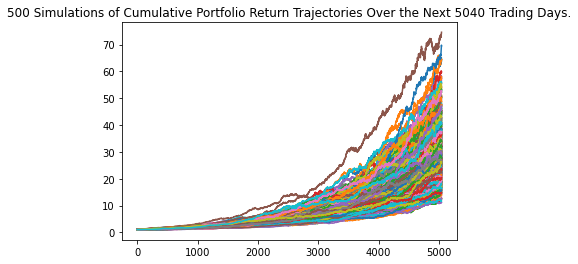

In [110]:
# Line plot for moderate monte carlo sim
line_plot_mod_crypto = MC_moderate_combined.plot_simulation()

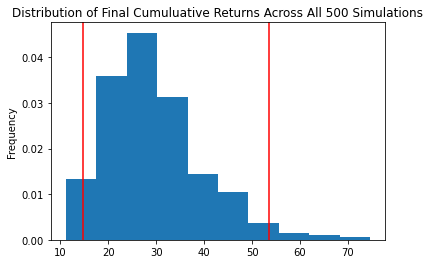

In [111]:
# Distribution plot for conservative monte carlo sim
dist_plot_mod = MC_moderate_combined.plot_distribution()

In [112]:
# Summary statistics
tbl_moderate_combined = MC_moderate_combined.summarize_cumulative_return()
print(tbl_moderate_combined)

count           500.000000
mean             29.527019
std              10.143045
min              11.145859
25%              22.306586
50%              27.643423
75%              34.700558
max              74.621011
95% CI Lower     14.694544
95% CI Upper     53.574788
Name: 5040, dtype: float64


### Monte Carlo for Aggressive Portfolio with Crypto

In [115]:
# Define monte carlo simulation for conservative portfoio with digital assets
MC_aggressive_combined = MCSimulation(
    portfolio_data = mod_combined_MC,
    weights = agg_weights_crypto,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [116]:
# Run monte carlo simulation
MC_aggressive_combined.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005884,1.013541,1.000088,0.999599,1.001201,0.991548,1.003413,1.003114,1.007203,1.012881,...,0.999612,0.991962,0.989112,0.997284,0.999366,1.006573,1.002892,0.998075,1.001570,0.999790
2,1.004830,1.013318,1.002175,1.004591,1.000455,0.977752,0.995443,1.011096,1.005742,1.013386,...,0.997683,0.998969,0.989043,0.999135,0.994156,1.007559,0.998940,1.003459,0.991016,1.009040
3,1.002707,1.009506,1.000919,1.013085,1.000294,0.985815,1.004617,1.016114,1.006037,1.005421,...,1.000547,1.001621,0.991932,1.001771,0.998419,1.008827,1.000884,1.003321,0.998681,1.008788
4,0.997955,1.024400,0.994222,1.002777,1.005746,0.988121,0.998199,1.015453,1.014394,0.998514,...,0.997332,1.013026,0.995523,0.995979,0.996069,1.021198,1.014322,1.005796,1.001949,1.017617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,110.706072,143.919836,78.781475,139.741257,39.503775,151.570154,74.665782,125.602990,106.194714,125.362731,...,176.387375,60.370582,81.007911,135.708782,82.991784,75.077379,149.435842,177.385559,69.277124,142.083601
5037,110.037756,145.383453,79.440533,138.833648,39.890573,151.647840,73.612268,125.785131,105.867445,124.516600,...,175.121620,59.666157,81.044301,136.931597,83.205213,75.030061,149.867252,178.428867,69.734464,144.527629
5038,109.508191,144.094295,79.956945,139.793713,40.005438,151.749062,73.047252,126.367241,106.660985,125.823462,...,176.196265,60.164500,81.179497,136.517739,83.903744,74.986379,150.405490,179.855599,70.377401,143.552775
5039,109.501966,145.729999,79.784186,141.389845,40.164575,151.087870,73.137013,127.378705,107.746108,125.463904,...,175.275461,60.568254,81.245103,136.551605,83.467044,75.147796,150.669996,179.804289,69.323402,143.443937


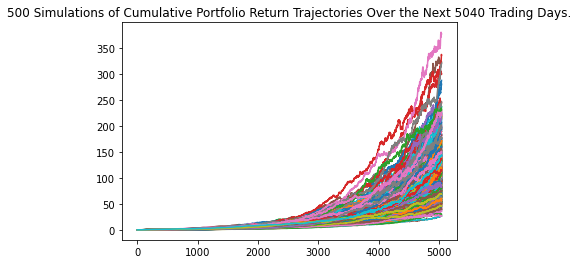

In [123]:
# Line plot for moderate monte carlo sim
line_plot_agg_crypto = MC_aggressive_combined.plot_simulation()

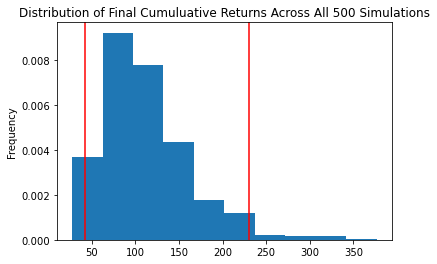

In [124]:
# Distribution plot for conservative monte carlo sim
dist_plot_agg = MC_aggressive_combined.plot_distribution()

In [125]:
# Summary statistics
tbl_aggressive_combined = MC_aggressive_combined.summarize_cumulative_return()
print(tbl_aggressive_combined)

count           500.000000
mean            112.325238
std              51.360023
min              27.564478
25%              76.088949
50%             103.215921
75%             136.066407
max             376.509602
95% CI Lower     41.907921
95% CI Upper    230.606163
Name: 5040, dtype: float64


## Find and plot Beta and Sharpe Ratios for all portfolios

### Beta of conservative portfolio with crypto

In [109]:
# Define risk free rate of return
rf_rate = 0.0158/365

In [118]:
sp500_csv = Path('Conservative_Combined_SPY.csv')
sp500_data = pd.read_csv(sp500_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
sp500_change= sp500_data.pct_change()
sp500_change.head()

,ETH,BTC,BIV,BSV,VB,VV,VXUS,SPY
Date,,,,,,,,
2016-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-15,0.002517,0.000204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10-16,0.000000,0.005892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10-17,0.000837,-0.003676,0.002075,0.001491,-0.001767,-0.002972,-0.001950,-0.003038
2016-10-18,0.048495,-0.006958,0.001725,0.000248,0.005817,0.006064,0.011941,0.006160


In [108]:
cons_cummulative_returns_crypto

Date
2016-10-14         NaN
2016-10-17   -0.000199
2016-10-18    0.004372
2016-10-19    0.001482
2016-10-20   -0.001375
                ...   
2021-10-25    0.004449
2021-10-26   -0.001381
2021-10-27   -0.004987
2021-10-28    0.007019
2021-10-29    0.000264
Length: 1262, dtype: float64

In [61]:
# Find conservative covariance
conservative_combined_covariance = cons_cummulative_returns_crypto.cov(sp500_change['SPY'])
conservative_combined_covariance

7.293495610445554e-05

In [121]:
# Calculate the variance of the SP500
variance = sp500_change['SPY'].var()
variance

9.750724307412973e-05

In [63]:
# Calculate beta of conservative portfolio
conservative_beta_crypto = conservative_combined_covariance/variance
conservative_beta_crypto

0.7479952648133724

### Beta of moderate portfolio with crypto

In [80]:
# Find moderate covariance
moderate_combined_covariance = mod_cummulative_returns_crypto.cov(sp500_change['SPY'])
moderate_combined_covariance

9.769884176983442e-05

In [81]:
# Calculate beta of moderate portfolio
moderate_beta_crypto = moderate_combined_covariance/variance
moderate_beta_crypto

1.0019649688542525

### Beta of aggressive portfolio with crypto

In [119]:
# Find aggressive covariance
aggressive_combined_covariance = aggressive_crypto_cumulative_returns.cov(sp500_change['SPY'])
aggressive_combined_covariance

0.0001754358418146587

In [122]:
# Calculate beta of aggressive portfolio
aggressive_beta_crypto = aggressive_combined_covariance/variance
aggressive_beta_crypto

1.7992083078513856

## Sharpe Ratios for all portfolios

In [110]:
# Calculate conservative portfolio sharpe ratio
conservative_crypto_sharpe_ratio = ((cons_cummulative_returns_crypto.mean() - rf_rate)/ (cons_cummulative_returns_crypto.std() * np.sqrt(252)))
conservative_crypto_sharpe_ratio

0.003907729999606194

In [111]:
# Calculate moderate portfolio sharpe ratio
moderate_crypto_sharpe_ratio = ((mod_cummulative_returns_crypto.mean() - rf_rate)/ (mod_cummulative_returns_crypto.std() * np.sqrt(252)))
moderate_crypto_sharpe_ratio

0.004411213536718502

In [112]:
# Calculate aggressive portfolio sharpe ratio
aggressive_crypto_sharpe_ratio = ((agg_cummulative_returns_crypto.mean() - rf_rate)/ (agg_cummulative_returns_crypto.std() * np.sqrt(252)))
aggressive_crypto_sharpe_ratio

0.005568776783298056

## Compare risk and return of traditional portfolios vs. portfolios with digital assets

In [ ]:
# Compare results of monte carlo simulations

In [ ]:
# Compare result cumulative returns 

In [ ]:
# Plot and compare beta

In [ ]:
# Compare Sharpe ratios 

## Identify locales in Philadelphia market to market each custom portfolio based on demographic

In [ ]:
# Define demographic parameters of target clients for each portfolio

In [ ]:
# Use an API to find geographic markets for each portfolio

In [ ]:
# Plot markets with Mapbox